&emsp;&emsp;在sklearn中有LocalOutlierFactor库，可以直接调用。下面来直观感受一下LOF的图像呈现效果。

&emsp;&emsp;LocalOutlierFactor库可以用于对单个数据集进行无监督的离群检测，也可以基于已有的正常数据集对新数据集进行新颖性检测。在这里我们进行单个数据集的无监督离群检测。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置简黑字体
plt.rcParams['axes.unicode_minus'] = False # 解决‘-’bug
pd.set_option('display.max_columns', None) # 显示所有列
pd.set_option('display.max_rows', None) # 显示所有行

首先构造一个含有集群和离群点的数据集

In [6]:
np.random.seed(2021)

# 构造两个数据集群
x_inlines1 = 0.2 * np.random.rand(100, 2)
x_inlines2 = 0.5 * np.random.rand(100, 2)
x_inlines = np.r_[x_inlines1 - 2, x_inlines2 + 2]

# 构造离群点
x_outlines = np.random.uniform(low=-4, high=4, size=(20, 2))

# 拼成数据集
X = np.r_[x_inlines, x_outlines]

n_outlines = len(x_outlines)
# 打标签，群内点为1，离群点为-1
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outlines:] = -1

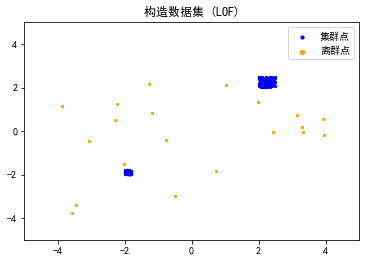

In [11]:
plt.title('构造数据集 (LOF)')
plt.scatter(X[:-n_outlines, 0], X[:-n_outlines, 1], color='b', s=5, label='集群点')
plt.scatter(X[-n_outlines:, 0], X[-n_outlines:, 1], color='orange', s=5, label='离群点')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
legend = plt.legend(loc='upper right')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

然后使用LocalOutlierFactor库对构造数据集进行训练，得到训练的标签和训练分数（局部离群值）。

In [18]:
# 模型
cof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# 对单个数据集进行无监督检测时，以1和-1分别表示非离群点与离群点
y_pred = cof.fit_predict(X)

# 找出构造离群值与实际离群值不同的点
n_errors = y_pred != ground_truth
y_pred = np.c_[X, n_errors]

X_scores = cof.negative_outlier_factor_
# 实际离群值有正有负，转化为正数并保留其差异性（不是直接取绝对值）
X_scores_normalize = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
y_pred = np.c_[y_pred, X_scores_normalize]
X_pred = pd.DataFrame(y_pred,columns=['x','y','pred','scores'])

X_pred_same = X_pred[X_pred['pred'] == False]
X_pred_different = X_pred[X_pred['pred'] == True]

# 直观地看一看数据
X_pred

,x,y,pred,scores
0,-1.878804,-1.853326,0.0,0.000537
1,-1.972211,-1.937465,0.0,0.006659
2,-1.800551,-1.974368,0.0,0.004105
3,-1.964201,-1.849415,0.0,0.003007
4,-1.867568,-1.843138,0.0,0.000914
5,-1.980621,-1.988286,1.0,0.012437
6,-1.807521,-1.876689,0.0,0.004946
7,-1.982674,-1.887746,0.0,0.004108
8,-1.876695,-1.807231,0.0,0.002362
9,-1.885139,-1.925768,0.0,0.001092


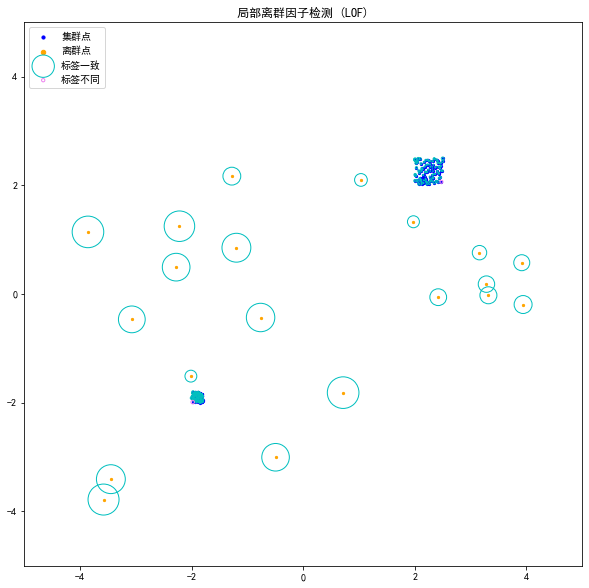

In [25]:
plt.figure(figsize=(10, 10))
plt.title('局部离群因子检测 (LOF)')
plt.scatter(X[:-n_outlines, 0], X[:-n_outlines, 1], color='b', s=5, label='集群点')
plt.scatter(X[-n_outlines:, 0], X[-n_outlines:, 1], color='orange', s=5, label='离群点')

# 以标准化之后的局部离群值为半径画圆，以圆的大小直观表示出每个数据点的离群程度
plt.scatter(X_pred_same.values[:,0], X_pred_same.values[:, 1], 
            s=1000 * X_pred_same.values[:, 3], edgecolors='c', 
            facecolors='none', label='标签一致')
plt.scatter(X_pred_different.values[:, 0], X_pred_different.values[:, 1], 
            s=1000 * X_pred_different.values[:, 3], edgecolors='violet', 
            facecolors='none', label='标签不同')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()